In [1]:
import pandas as pd
import numpy as np

news = pd.read_csv(r'C:\Users\nicko\Desktop\archive\us_equities_news_dataset.csv')
news.tail(15)

,id,ticker,title,category,content,release_date,provider,url,article_id
221498,443014,T,TECO Energy No Big Change Expected,opinion,In this article we introduce a tentative pric...,2012-11-22,Ivan Kitov,https://www.investing.com/analysis/teco-energy...,144622
221499,443015,T,U S Stocks Finish Higher On Positive Employme...,opinion,U S stocks closed with modest gains after hov...,2012-12-06,Midnight Trader,https://www.investing.com/analysis/u.s.-stocks...,146509
221500,443016,T,The Rare Earth Sector Needs These Three Things...,opinion,For too long the rare earth space has operate...,2012-12-19,The Gold Report,https://www.investing.com/analysis/the-rare-ea...,148264
221501,443017,T,Autonation s Share May Fall In Q4,opinion,Here we revisit our price model for AutoNation...,2012-11-13,Ivan Kitov,https://www.investing.com/analysis/autonation'...,143414
221502,443018,T,India s Gold Demand Rises While China Cools,opinion,Gold demand overall is high as Market sentimen...,2012-11-15,Commodity Trade Mantra,https://www.investing.com/analysis/india’s-gol...,143727
221503,443019,T,Pitney Bowes Share Price May Continue Its Lon...,opinion,This time we would like to revisit our determ...,2012-11-18,Ivan Kitov,https://www.investing.com/analysis/pitney-bowe...,144038
221504,443020,T,Spain 33 Unemployed In 2013,opinion,A year ago using the LSQ technique as applie...,2012-10-14,Ivan Kitov,https://www.investing.com/analysis/spain:-33-u...,139702
221505,443021,T,S P 500 Returns Imply Real GDP Growth Of 4 In...,opinion,We have been following the link between the S ...,2012-10-14,Ivan Kitov,https://www.investing.com/analysis/s-p-500-ret...,139747
221506,443022,T,A Critical Metals Mixed Bag Chris Ecclestone,opinion,A flood of companies scrambled to capitalize o...,2012-10-31,The Gold Report,https://www.investing.com/analysis/a-critical-...,141819
221507,443023,T,Weighing The Week Ahead Time For A Confidence...,opinion,Everyone agrees that the economic recovery has...,2012-09-24,Jeff Miller,https://www.investing.com/analysis/weighing-th...,137387


In [2]:
pd.set_option('display.max_colwidth', -1)

In [3]:
important_news= news[['ticker','title','release_date']]
important_news = important_news.sort_values(by='release_date', ascending=True)
important_news.head()

,ticker,title,release_date
6235,KYOCY,Nikkei down 1 4 pct on economy fears autos drop,2008-10-02
105598,TGT,FOREX Dollar poised for biggest weekly gain in 16 years,2008-10-03
214228,C,GLOBAL MARKETS Stocks rally on Wells Wachovia deal dollar gains,2008-10-03
220286,WFC,GLOBAL MARKETS Stocks hold up after Wells Wachovia deal,2008-10-03
220287,WFC,GLOBAL MARKETS U S bailout plan passes investors take profits,2008-10-03


In [5]:
important_news['sentiment'] = np.nan
important_news['title'] = important_news['title'].replace('  ',' ')
important_news['title'] = important_news['title'].replace('   ',' ')
important_news.head()

,ticker,title,release_date,sentiment
6235,KYOCY,Nikkei down 1 4 pct on economy fears autos drop,2008-10-02,NaN
105598,TGT,FOREX Dollar poised for biggest weekly gain in 16 years,2008-10-03,NaN
214228,C,GLOBAL MARKETS Stocks rally on Wells Wachovia deal dollar gains,2008-10-03,NaN
220286,WFC,GLOBAL MARKETS Stocks hold up after Wells Wachovia deal,2008-10-03,NaN
220287,WFC,GLOBAL MARKETS U S bailout plan passes investors take profits,2008-10-03,NaN


# Bert Pre trained

In [6]:
import os
import copy
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM, BertConfig
from bertModel import BertClassification, dense_opt
from datasets import text_dataset, financialPhraseBankDataset
import argparse
from sklearn.metrics import f1_score

In [7]:
labels = {0:'neutral', 1:'positive',2:'negative'}
num_labels= len(labels)
vocab = "finance-uncased"
#vocab_path = "/home/root/new_bert_vocab_uncased_8000"
vocab_path = r'analyst_tone\vocab'
pretrained_weights_path = r"analyst_tone\pretrained_weights" # this is pre-trained FinBERT weights
fine_tuned_weight_path = r"analyst_tone\fine_tuned.pth"      # this is fine-tuned FinBERT weights
max_seq_length=256
device='cuda:0'

In [8]:
model = BertClassification(weight_path= pretrained_weights_path, num_labels=num_labels, vocab=vocab)

C:\Users\nicko\bertModel.py:38: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  nn.init.xavier_normal(self.classifier.weight)


In [9]:
model.load_state_dict(torch.load(fine_tuned_weight_path, map_location='cuda:0'))
model.to(device)

BertClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30873, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): BertLayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): BertLayerNorm()
              (dropout): Dropout(p=0.1, inplace=False)
            )


In [10]:
print(important_news.shape)
important_news = important_news.loc[(important_news["ticker"] =="AAPL") | (important_news["ticker"] =="MSFT")]
print(important_news.shape)
headlines = list(important_news['title'])

(221513, 4)
(28341, 4)


In [11]:
tokenizer = BertTokenizer(vocab_file = vocab_path, do_lower_case = True, do_basic_tokenize = True)

In [12]:
import time
start_time = time.time()

for sent in headlines: 
    tokenized_sent = tokenizer.tokenize(sent)
    if len(tokenized_sent) > max_seq_length:
        tokenized_sent = tokenized_sent[:max_seq_length]
    
    ids_review  = tokenizer.convert_tokens_to_ids(tokenized_sent)
    mask_input = [1]*len(ids_review)        
    padding = [0] * (max_seq_length - len(ids_review))
    ids_review += padding
    mask_input += padding
    input_type = [0]*max_seq_length
    
    input_ids = torch.tensor(ids_review).to(device).reshape(-1, 256)
    attention_mask =  torch.tensor(mask_input).to(device).reshape(-1, 256)
    token_type_ids = torch.tensor(input_type).to(device).reshape(-1, 256)
    
    with torch.set_grad_enabled(False):
        outputs = model(input_ids, token_type_ids, attention_mask)
        outputs = F.softmax(outputs,dim=1)
        #print(sent, '\nBERT predicted sentiment: ', labels[torch.argmax(outputs).item()], '\n')
        important_news.loc[important_news['title'] == sent, 'sentiment'] = labels[torch.argmax(outputs).item()]
print("--- %s seconds ---" % (time.time() - start_time))# ~ 27 mins

C:\Users\nicko\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\nicko\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\nicko\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

--- 1617.569286108017 seconds ---


In [13]:
important_news.head(10)

,ticker,title,release_date,sentiment
77424,MSFT,GLOBAL MARKETS U S stocks retreat on recession fears oil falls,2008-10-15,neutral
77425,MSFT,GLOBAL MARKETS U S stocks oil slide on global recession fears,2008-10-15,neutral
77426,MSFT,INTERVIEW UPDATE 2 Nintendo Wii DS sales strong,2008-12-08,neutral
77427,MSFT,Nintendo Dentsu to distribute video on Wii Nikkei,2008-12-24,neutral
77428,MSFT,UPDATE 1 Nintendo Dentsu to offer video on Wii,2008-12-24,neutral
77429,MSFT,COLUMN What Apple loses without Steve Eric Auchard,2009-01-15,negative
77430,MSFT,INTERVIEW Namco Bandai aims to double game profit in 3 yrs,2009-01-19,neutral
77431,MSFT,WRAPUP 3 Qimonda Samsung hit by chip market crash,2009-01-23,neutral
77405,MSFT,UPDATE 2 Microsoft to open own stores take on Apple,2009-02-12,neutral
77407,MSFT,ANALYSIS Video gaming could be bargain buy of UK equities,2009-03-25,neutral


In [14]:
apple = important_news.loc[(important_news["ticker"] =="AAPL")]
microsoft = important_news.loc[(important_news["ticker"] =="MSFT")]

apple['weekday']= pd.to_datetime(apple['release_date']).dt.day_name(locale='en_US.utf8')
microsoft['weekday']= pd.to_datetime(microsoft['release_date']).dt.day_name(locale='en_US.utf8')


import datetime

DD = datetime.timedelta(days=1)
#filter for saturdays date -1 to get the date to friday
#Saturdays
saturday = apple['weekday'] == "Saturday"
apple.loc[saturday,"release_date"] = pd.to_datetime(apple.loc[saturday,"release_date"]).dt.date - DD
saturday = microsoft['weekday'] == "Saturday"
microsoft.loc[saturday,"release_date"] = pd.to_datetime(microsoft.loc[saturday,"release_date"]).dt.date - DD

#Sundays
DD = datetime.timedelta(days=2)

sunday = apple['weekday'] == "Sunday"
apple.loc[sunday,"release_date"] = pd.to_datetime(apple.loc[sunday,"release_date"]).dt.date - DD

sunday = microsoft['weekday'] == "Sunday"
microsoft.loc[sunday,"release_date"] = pd.to_datetime(microsoft.loc[sunday,"release_date"]).dt.date - DD

C:\Users\nicko\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\nicko\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\nicko\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/u

In [15]:
apple.shape

(20231, 5)

In [16]:
microsoft.shape

(8110, 5)

## Loading stock csvs

In [18]:
apple_csv = pd.read_csv(r'C:\Users\nicko\Desktop\ticker_cube\AAPL.csv')
msft_csv = pd.read_csv(r'C:\Users\nicko\Desktop\ticker_cube\MSFT.csv')

apple_stocks = apple_csv[['Date','Open']]
apple_stocks = apple_stocks.rename(columns={"Date": "date_y", "Open": "Open"})
microsoft_stocks = msft_csv[['Date','Open']]
microsoft_stocks = microsoft_stocks.rename(columns={"Date": "date_y", "Open": "Open"})
microsoft_stocks.head()

,date_y,Open
0,2009-09-21,25.110001
1,2009-09-22,25.400000
2,2009-09-23,25.920000
3,2009-09-24,25.920000
4,2009-09-25,25.690001


In [19]:
print('AAPL')
print(len(set(apple_stocks.date_y)))
print(len(set(apple.release_date)))
apple = apple[apple.release_date.isin(apple_stocks.date_y)]
apple_stocks = apple_stocks[apple_stocks.date_y.isin(apple.release_date)]
print(len(set(apple_stocks.date_y)))
print(len(set(apple.release_date)))
print('\n')
print('MSFT')
print(len(set(microsoft_stocks.date_y)))
print(len(set(microsoft.release_date)))
microsoft = microsoft[microsoft.release_date.isin(microsoft_stocks.date_y)]
microsoft_stocks = microsoft_stocks[microsoft_stocks.date_y.isin(microsoft.release_date)]
print(len(set(microsoft_stocks.date_y)))
print(len(set(microsoft.release_date)))

AAPL
2769
2144
1740
1740


MSFT
2769
1719
1435
1435


In [19]:
apple_stocks = merged_stocks.loc[merged_stocks['ticker'] == 'AAPL']
print(apple_stocks.shape)
microsoft_stocks = merged_stocks.loc[merged_stocks['ticker'] == 'MSFT']
print(microsoft_stocks.shape)

(3013, 3)
(3013, 3)


In [21]:
news = microsoft.groupby(['release_date'])['title'].apply(list).reset_index(name='headlines')
news.head()

,release_date,headlines
0,2008-10-15,"[GLOBAL MARKETS U S stocks retreat on recession fears oil falls, GLOBAL MARKETS U S stocks oil slide on global recession fears]"
1,2008-12-08,[INTERVIEW UPDATE 2 Nintendo Wii DS sales strong]
2,2008-12-24,"[Nintendo Dentsu to distribute video on Wii Nikkei, UPDATE 1 Nintendo Dentsu to offer video on Wii]"
3,2009-01-15,[COLUMN What Apple loses without Steve Eric Auchard]
4,2009-01-23,[WRAPUP 3 Qimonda Samsung hit by chip market crash]


In [20]:
microsoft_stocks['weekday']= pd.to_datetime(microsoft_stocks['date_y']).dt.day_name(locale='en_US.utf8')
print(microsoft_stocks.head())

apple_stocks['weekday']= pd.to_datetime(apple_stocks['date_y']).dt.day_name(locale='en_US.utf8')
apple_stocks.head()

        date_y       Open   weekday
3   2009-09-24  25.920000  Thursday
8   2009-10-01  25.410000  Thursday
23  2009-10-22  26.559999  Thursday
24  2009-10-23  29.200001  Friday  
25  2009-10-26  28.129999  Monday  


,date_y,Open,weekday
710,2012-07-16,21.611429,Monday
713,2012-07-19,21.831429,Thursday
715,2012-07-23,21.228571,Monday
716,2012-07-24,21.692142,Tuesday
719,2012-07-27,20.536072,Friday


In [21]:
apple_prices = apple_stocks[['date_y','Open']]
print(apple_prices.head())

msft_prices = microsoft_stocks[['date_y','Open']]
print(msft_prices.head())

         date_y       Open
710  2012-07-16  21.611429
713  2012-07-19  21.831429
715  2012-07-23  21.228571
716  2012-07-24  21.692142
719  2012-07-27  20.536072
        date_y       Open
3   2009-09-24  25.920000
8   2009-10-01  25.410000
23  2009-10-22  26.559999
24  2009-10-23  29.200001
25  2009-10-26  28.129999


In [22]:
apple_merged = pd.merge(apple,apple_prices,how='left',left_on='release_date',right_on='date_y')
print('AAPL')
print(apple_merged.shape)
print('\n')
print('MSFT')
msft_merged = pd.merge(microsoft,msft_prices,how='left',left_on='release_date',right_on='date_y')
print(msft_merged.shape)
msft_merged.head()

AAPL
(17648, 7)


MSFT
(7202, 7)


,ticker,title,release_date,sentiment,weekday,date_y,Open
0,MSFT,US STOCKS Futures flat as G20 data on housing and jobs eyed,2009-09-24,neutral,Thursday,2009-09-24,25.92
1,MSFT,US STOCKS Futures flat as housing jobless claims data ahead,2009-09-24,neutral,Thursday,2009-09-24,25.92
2,MSFT,US STOCKS Wall St set to rise on claims data housing eyed,2009-09-24,neutral,Thursday,2009-09-24,25.92
3,MSFT,Nikkei likely to slip but falls limited,2009-09-24,neutral,Thursday,2009-09-24,25.92
4,MSFT,US STOCKS SNAPSHOT Nasdaq falls 2 pct as selloff accelerates,2009-10-01,neutral,Thursday,2009-10-01,25.41


In [24]:
apple.loc[apple['sentiment'] == 'neutral', 'sentiment'] = 2
apple.loc[apple['sentiment'] == 'positive', 'sentiment'] = 3
apple.loc[apple['sentiment'] == 'negative', 'sentiment'] = 1
microsoft.loc[microsoft['sentiment'] == 'neutral', 'sentiment'] = 2
microsoft.loc[microsoft['sentiment'] == 'positive', 'sentiment'] = 3
microsoft.loc[microsoft['sentiment'] == 'negative', 'sentiment'] = 1

apple['sentiment'] = apple['sentiment'].astype(float)
microsoft['sentiment'] = microsoft['sentiment'].astype(float)

In [25]:
avg_apple_sent_df = apple.copy()
avg_apple_sent_df = avg_apple_sent_df[['release_date','sentiment']]
apple_grouped_sent = avg_apple_sent_df.groupby(['release_date']).mean()

avg_msft_sent_df = microsoft.copy()
avg_msft_sent_df = avg_msft_sent_df[['release_date','sentiment']]
print(avg_msft_sent_df.head(10))
msft_grouped_sent = avg_msft_sent_df.groupby(['release_date']).mean()
msft_grouped_sent

      release_date  sentiment
77315  2009-09-24   2.0      
77316  2009-09-24   2.0      
77317  2009-09-24   2.0      
77318  2009-09-24   2.0      
77319  2009-10-01   2.0      
77299  2009-10-22   2.0      
77321  2009-10-22   2.0      
77301  2009-10-23   2.0      
77305  2009-10-23   2.0      
77304  2009-10-23   2.0      


,sentiment
release_date,
2009-09-24,2.000000
2009-10-01,2.000000
2009-10-22,2.000000
2009-10-23,2.000000
2009-10-26,2.000000
...,...
2020-01-27,2.000000
2020-01-28,1.700000
2020-01-29,2.000000


In [26]:
apple_train_df = pd.DataFrame(apple_grouped_sent)
apple_train_df['index'] = apple_train_df.index
apple_data = apple_merged[['release_date','Open']]
apple_train_df['Open'] = np.nan
for index,row in apple_data.iterrows():
    apple_train_df.loc[apple_train_df['index'] == row['release_date'], 'Open'] = row['Open']
print(apple_train_df.shape)

msft_train_df = pd.DataFrame(msft_grouped_sent)
msft_train_df['index'] = msft_train_df.index
msft_data = msft_merged[['release_date','Open']]
msft_train_df['Open'] = np.nan
for index,row in msft_data.iterrows():
    msft_train_df.loc[msft_train_df['index'] == row['release_date'], 'Open'] = row['Open']
msft_train_df.shape

(1740, 3)


(1435, 3)

In [27]:
apple_train_df['Open'] = apple_train_df['Open'].diff(periods=1)
apple_train_df = apple_train_df.reset_index(drop=True)
print(apple_train_df)

msft_train_df['Open'] = msft_train_df['Open'].diff(periods=1)
msft_train_df = msft_train_df.reset_index(drop=True)
msft_train_df

      sentiment       index      Open
0     2.000000   2012-07-16 NaN      
1     2.000000   2012-07-19  0.220000
2     2.000000   2012-07-23 -0.602858
3     2.000000   2012-07-24  0.463571
4     2.000000   2012-07-27 -1.156070
...        ...          ...       ...
1735  2.200000   2020-01-22  0.347496
1736  2.291667   2020-01-23 -0.164994
1737  2.062500   2020-01-24  0.582497
1738  2.250000   2020-01-27 -2.547501
1739  2.202899   2020-01-28  0.635003

[1740 rows x 3 columns]


,sentiment,index,Open
0,2.000000,2009-09-24,NaN
1,2.000000,2009-10-01,-0.510000
2,2.000000,2009-10-22,1.149999
3,2.000000,2009-10-23,2.640002
4,2.000000,2009-10-26,-1.070002
...,...,...,...
1430,2.000000,2020-01-27,-6.360001
1431,1.700000,2020-01-28,2.630005
1432,2.000000,2020-01-29,4.059997
1433,2.274194,2020-01-30,6.210007


In [28]:
apple_train_df = apple_train_df.drop(0)
print('AAPL')
print(apple_train_df.shape)
print(apple_train_df.head())
print('\n')
print('MSFT')
msft_train_df = msft_train_df.drop(0)
print(msft_train_df.shape)
msft_train_df.head()

AAPL
(1739, 3)
   sentiment       index      Open
1  2.0        2012-07-19  0.220000
2  2.0        2012-07-23 -0.602858
3  2.0        2012-07-24  0.463571
4  2.0        2012-07-27 -1.156070
5  2.0        2012-07-30  0.568214


MSFT
(1434, 3)
   sentiment       index      Open
1  2.0        2009-10-01 -0.510000
2  2.0        2009-10-22  1.149999
3  2.0        2009-10-23  2.640002
4  2.0        2009-10-26 -1.070002
5  2.0        2009-10-28  0.110001


In [29]:
apple_train_df.loc[apple_train_df['Open'] < 0.0, 'Open'] = 0
apple_train_df.loc[apple_train_df['Open'] > 0.0, 'Open'] = 1
apple_train_df = apple_train_df[['sentiment','Open']]


msft_train_df.loc[msft_train_df['Open'] < 0.0, 'Open'] = 0
msft_train_df.loc[msft_train_df['Open'] > 0.0, 'Open'] = 1
msft_train_df = msft_train_df[['sentiment','Open']]
msft_train_df.head()

,sentiment,Open
1,2.000000,0.0
2,2.000000,1.0
3,2.000000,1.0
4,2.000000,0.0
5,2.000000,1.0
...,...,...
1430,2.000000,0.0
1431,1.700000,1.0
1432,2.000000,1.0
1433,2.274194,1.0


## Functions for dynamic modeling

In [86]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense,Dropout
from numpy import array
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical 
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [31]:
# split a univariate sequence into samples
def split_sequence(df, n_steps):
    X, y = list(), list()
    for i in range(df.shape[0]):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(df)-1:
            break
        # gather input and output parts of the pattern
        seq_x = df.iloc[i:end_ix,0]
        seq_y = df['Open'][end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X),array(y)

In [39]:
def preprocess_data(df,
                    n_steps,
                    pct = 0.8):
    """
    param df: input dataframe
    pct: split percent to training set
    param n_steps : timestep number
    """
    print('mpike stin preprocess')
    # define input sequence
    df = df[['sentiment','Open']]
    df['sentiment'] = df['sentiment'].round(2)
    df['Open'] = df['Open'].astype(int)
    # split into samples
    split = int(round(pct * df.shape[0]))
    train_set = df.iloc[:split,:]
    test_set = df.iloc[split:,:]
    test_set = test_set.reset_index(drop=True)
    n_features = 1
    X_train,y_train = split_sequence(train_set, n_steps)
    X_test,y_test = split_sequence(test_set, n_steps)
    # reshape from [samples, timesteps] into [samples, timesteps, features]    
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))    
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

    y_train = to_categorical(y_train, num_classes=2)
    
 
    
    return X_train,y_train,X_test,y_test

In [32]:
def build_model(n_steps,
                target_shape,
                stacked = False):
    """
    param n_steps : timestep number
    param target_shape: target variable shape
    param stacked: extra hidden layer added
    """
    print('mpike stin build_model')
    model = Sequential()
    
    if stacked:
        model.add(LSTM(150,return_sequences=True, input_shape=(n_steps, 1),name='lstm_layer_1'))
        model.add(Dropout(0.1, name='dropout_layer_1'))
        model.add(LSTM(150,return_sequences=False,name='lstm_layer_2'))
        model.add(Dropout(0.1, name='dropout_layer_2'))
        model.add(Dense(target_shape,name='output_layer', activation='sigmoid'))        
    else:
        model.add(LSTM(50, activation='sigmoid', input_shape=(n_steps, 1)))
        model.add(Dense(target_shape))
        
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model 

In [95]:
def run_evaluate_model(df,
                       n_steps,
                       pct = 0.8,
                       stacked = False,
                       nb_epochs = 50):
    """
    param df: input dataframe
    param n_steps : timestep number
    param pct: split percent to training set
    param stacked: extra hidden layer added
    param nb_epochs: number of epochs
    """
    steps = list()
    acc = list()
    for step in n_steps:
        
        print('mpike stin run_evaluate me step '+str(step))
        
        X_train,y_train,X_test,y_test = preprocess_data(df,int(step),pct)

        model = build_model(step,y_train.shape[1],stacked)

        model.fit(X_train, y_train, epochs=nb_epochs,verbose=0)

        y_test_pred = model.predict_classes(X_test)
        
        lr_probs = model.predict_proba(X_test)
        lr_probs = lr_probs[:, 1]
        lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
        lr_f1, lr_auc = f1_score(y_test, y_test_pred), auc(lr_recall, lr_precision)
        print('Model metrics: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
        no_skill = len(y_test[y_test==1]) / len(y_test)
        plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
        plt.plot(lr_recall, lr_precision, marker='.', label='LSTM')
        # axis labels
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        # show the legend
        plt.legend()
        # show the plot
        plt.show()
        conf_mat = confusion_matrix(y_test, y_test_pred)
        cm_df = pd.DataFrame(conf_mat)
        print(cm_df)
        print(classification_report(y_test,y_test_pred))

        y_test = to_categorical(y_test, num_classes=2)
        score = model.evaluate(X_test,y_test)
        print(f'Test loss: {score[0]}:') 
        print('Test accuracy: {:.3f} %'.format(100 * score[1]))
        get_accuracy_heatmap(cm_df)
        steps.append(step)
        acc.append(score[1])
    return steps,acc

In [73]:
def get_accuracy_heatmap(df):
    fig = plt.figure(figsize=(5,5))
    try:
        heatmap = sns.heatmap(df, annot=True, fmt="d")

    except ValueError:

        raise ValueError("Confusion matrix values must be integers.")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),
                                 rotation=0,
                                 ha='right',
                                 fontsize=14)

    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),
                                 rotation=45,
                                 ha='right',
                                 fontsize=14)
    plt.show()

In [81]:
def get_accuracy_steps(steps,acc):
    fig = plt.figure(figsize=(5,5))
    plt.ylabel('Accuracy')
    plt.xlabel('Timesteps')
    plt.plot(steps, acc,marker="o")
    plt.show()

## Apple predict

### Target variable distribution

In [102]:
apple_Freq = apple_train_df.groupby('Open').count()
apple_group =apple_Freq.rename(columns={'Open':'Open','sentiment':'Count'})
apple_group

,Count
Open,
0,797
1,942


mpike stin run_evaluate me step 60
mpike stin preprocess
mpike stin build_model
Model metrics: f1=0.680 auc=0.598


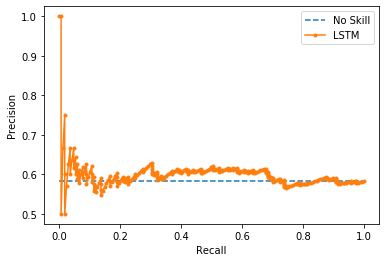

    0    1
0  22  98 
1  31  137
              precision    recall  f1-score   support

           0       0.42      0.18      0.25       120
           1       0.58      0.82      0.68       168

    accuracy                           0.55       288
   macro avg       0.50      0.50      0.47       288
weighted avg       0.51      0.55      0.50       288

288/288 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 2s 7ms/step
Test loss: 0.6944605575667487:
Test accuracy: 55.208 %


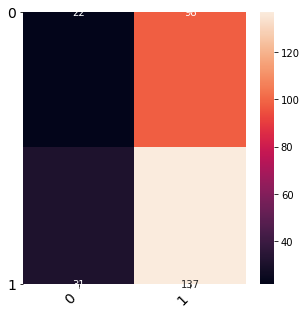

mpike stin run_evaluate me step 45
mpike stin preprocess
mpike stin build_model
Model metrics: f1=0.686 auc=0.599


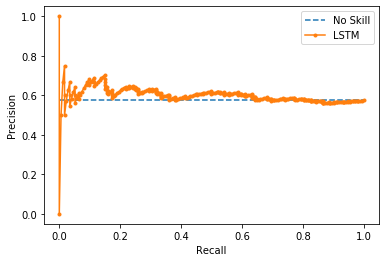

    0    1
0  25  104
1  29  145
              precision    recall  f1-score   support

           0       0.46      0.19      0.27       129
           1       0.58      0.83      0.69       174

    accuracy                           0.56       303
   macro avg       0.52      0.51      0.48       303
weighted avg       0.53      0.56      0.51       303

303/303 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 2s 6ms/step
Test loss: 0.6857539393720847:
Test accuracy: 56.106 %


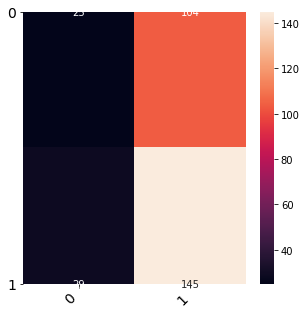

mpike stin run_evaluate me step 30
mpike stin preprocess
mpike stin build_model
Model metrics: f1=0.565 auc=0.528


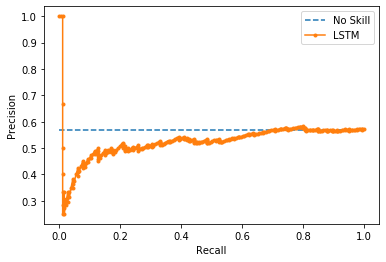

    0    1
0  51  86 
1  76  105
              precision    recall  f1-score   support

           0       0.40      0.37      0.39       137
           1       0.55      0.58      0.56       181

    accuracy                           0.49       318
   macro avg       0.48      0.48      0.48       318
weighted avg       0.49      0.49      0.49       318

318/318 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 2s 5ms/step
Test loss: 0.7485827380006418:
Test accuracy: 49.057 %


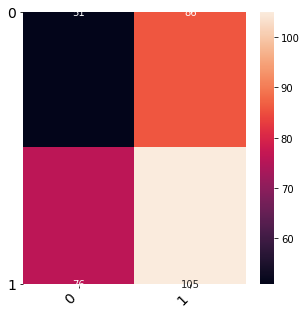

mpike stin run_evaluate me step 15
mpike stin preprocess
mpike stin build_model
Model metrics: f1=0.615 auc=0.546


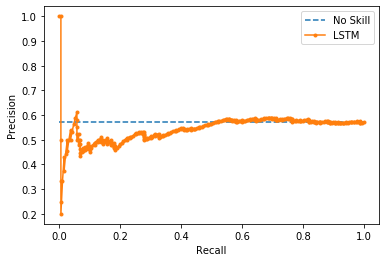

    0    1
0  47  96 
1  63  127
              precision    recall  f1-score   support

           0       0.43      0.33      0.37       143
           1       0.57      0.67      0.62       190

    accuracy                           0.52       333
   macro avg       0.50      0.50      0.49       333
weighted avg       0.51      0.52      0.51       333

333/333 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 4ms/step
Test loss: 0.7519956873701857:
Test accuracy: 52.252 %


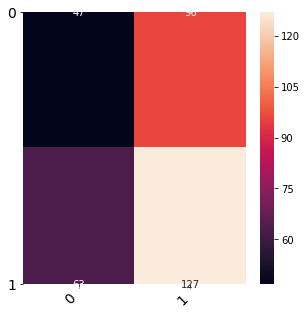

mpike stin run_evaluate me step 5
mpike stin preprocess
mpike stin build_model
Model metrics: f1=0.652 auc=0.625


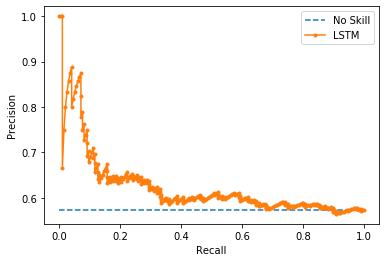

    0    1
0  39  107
1  50  147
              precision    recall  f1-score   support

           0       0.44      0.27      0.33       146
           1       0.58      0.75      0.65       197

    accuracy                           0.54       343
   macro avg       0.51      0.51      0.49       343
weighted avg       0.52      0.54      0.52       343

343/343 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - 1s 3ms/step
Test loss: 0.6803394168528454:
Test accuracy: 54.227 %


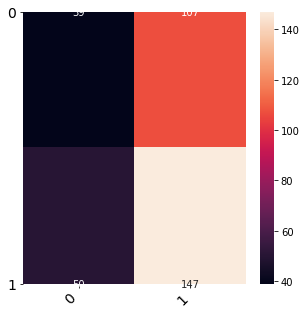

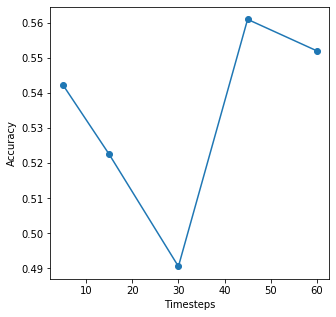

In [96]:
steps,accuracies = run_evaluate_model(apple_train_df,[5,15,30,60],0.8,True,200)
get_accuracy_steps(steps,accuracies)

## Microsoft predict

### Target variable distribution

In [103]:
msft_Freq = msft_train_df.groupby('Open').count()
msft_group =msft_Freq.rename(columns={'Open':'Open','sentiment':'Count'})
msft_group

,Count
Open,
0.0,641
1.0,793


mpike stin run_evaluate me step 60
mpike stin preprocess
mpike stin build_model
Model metrics: f1=0.742 auc=0.588


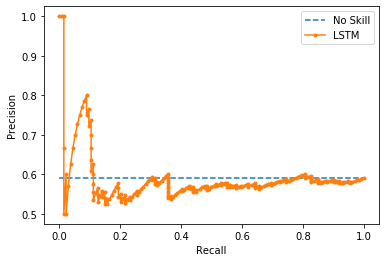

   0    1
0  0  93 
1  0  134


C:\Users\nicko\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.59      1.00      0.74       134

    accuracy                           0.59       227
   macro avg       0.30      0.50      0.37       227
weighted avg       0.35      0.59      0.44       227

227/227 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 2s 9ms/step
Test loss: 0.6797052734748907:
Test accuracy: 59.031 %


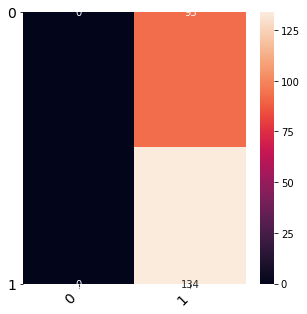

mpike stin run_evaluate me step 45
mpike stin preprocess
mpike stin build_model
Model metrics: f1=0.743 auc=0.605


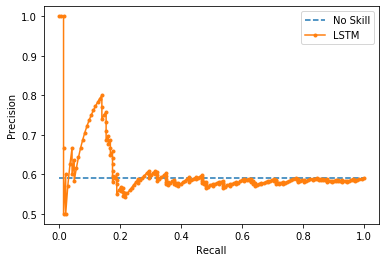

   0    1
0  0  99 
1  0  143


C:\Users\nicko\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.59      1.00      0.74       143

    accuracy                           0.59       242
   macro avg       0.30      0.50      0.37       242
weighted avg       0.35      0.59      0.44       242

242/242 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 2s 8ms/step
Test loss: 0.6795929034879385:
Test accuracy: 59.091 %


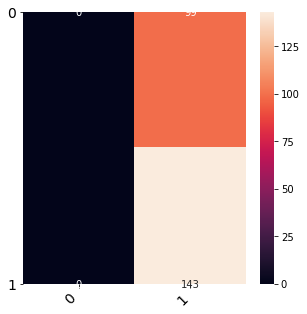

mpike stin run_evaluate me step 30
mpike stin preprocess
mpike stin build_model
Model metrics: f1=0.734 auc=0.600


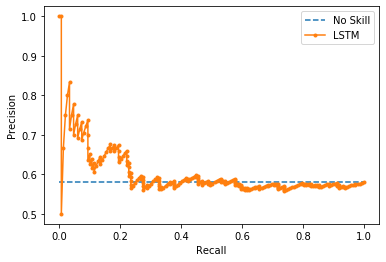

   0    1
0  0  108
1  0  149


C:\Users\nicko\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.58      1.00      0.73       149

    accuracy                           0.58       257
   macro avg       0.29      0.50      0.37       257
weighted avg       0.34      0.58      0.43       257

257/257 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 2s 6ms/step
Test loss: 0.6823549632432396:
Test accuracy: 57.977 %


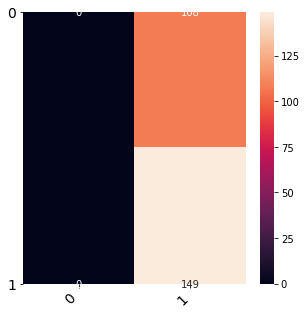

mpike stin run_evaluate me step 15
mpike stin preprocess
mpike stin build_model
Model metrics: f1=0.729 auc=0.573


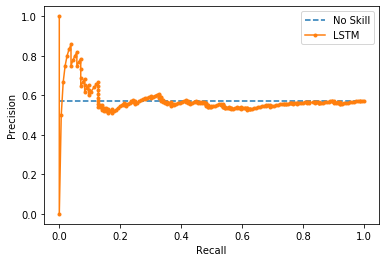

   0    1
0  0  116
1  0  156


C:\Users\nicko\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.57      1.00      0.73       156

    accuracy                           0.57       272
   macro avg       0.29      0.50      0.36       272
weighted avg       0.33      0.57      0.42       272

272/272 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 5ms/step
Test loss: 0.6833967952167287:
Test accuracy: 57.353 %


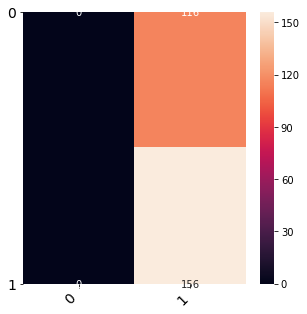

mpike stin run_evaluate me step 5
mpike stin preprocess
mpike stin build_model
Model metrics: f1=0.721 auc=0.603


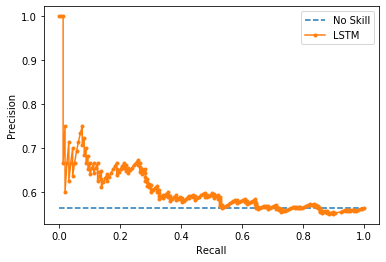

   0    1
0  0  123
1  0  159


C:\Users\nicko\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.56      1.00      0.72       159

    accuracy                           0.56       282
   macro avg       0.28      0.50      0.36       282
weighted avg       0.32      0.56      0.41       282

282/282 [==============================] - ETA:  - ETA:  - ETA:  - 1s 4ms/step
Test loss: 0.6853475727088062:
Test accuracy: 56.383 %


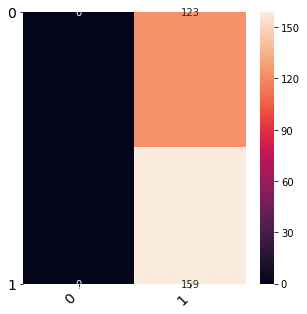

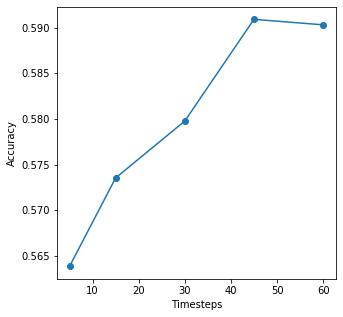

In [97]:
steps,accuracies = run_evaluate_model(msft_train_df,[60,45,30,15,5],0.8,True,150)
get_accuracy_steps(steps,accuracies)